In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Rebalancing Data

In [16]:
df = pd.read_csv('../data1/amazon_reviews_us_Outdoors_v1_00.csv.gz')

In [10]:
def to_sentiment(rating):
    rating = int(rating)
    if rating <= 2:
        return 0
    elif rating == 3:
        return 1
    else:
        return 2

In [17]:
df['sentiment'] = df.star_rating.apply(to_sentiment)

In [13]:
len(df[df.sentiment == 0]), len(df[df.sentiment == 1]), len(df[df.sentiment == 2])

(270367, 178919, 1850715)

In [20]:
positive_samples_index = df[df.sentiment == 2].sample(n=275000).index

In [22]:
positive_samples_index

Int64Index([1131626, 1456539, 2093745,  779999, 2005103,  362590,  739301,
            2141891, 1680561,  110615,
            ...
            1487008,  764409, 1616829, 1139189,  963602, 1001202,  653663,
            1051786, 1064234,  702877],
           dtype='int64', length=275000)

In [24]:
negative_indices = df[df.sentiment == 0].index
neutral_indices = df[df.sentiment == 1].index

In [31]:
df_balanced = df.iloc[list(positive_samples_index) + list(negative_indices) + list(neutral_indices)]

C:\Users\suraj\Miniconda3\envs\NLP\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


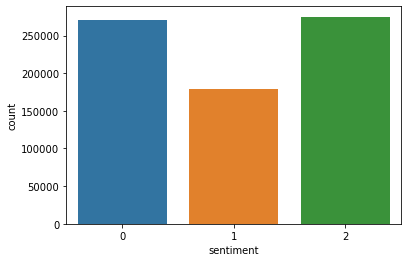

In [32]:
sns.countplot(df_balanced.sentiment)
plt.show()

In [33]:
df_balanced.to_csv('data/amazon_outdoors/amazon_reviews_us_Outdoors_v1_00_rebalanced.csv.gz', index=False)

# EDA

## Analyse token lengths

In [3]:
reviews = pd.read_csv('../data/amazon_outdoors/amazon_reviews_us_Outdoors_v1_00_rebalanced.csv.gz', usecols=['review_body'])

In [16]:
for txt in reviews.review_body:
    print(txt)
    break

So far 3 semesters and it's still holding its own and looking brand new. Lots of room and super sturdy.


In [17]:
from transformers import BertTokenizer

In [18]:
tokenizer = BertTokenizer.from_pretrained('bert-base-cased')

In [22]:
reviews[reviews.isna()] = ""

In [ ]:
token_lens = []
for txt in reviews.review_body:
    tokens = tokenizer.encode(txt, max_length=512, truncation=True)
    token_lens.append(len(tokens))

C:\Users\suraj\Miniconda3\envs\NLP\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


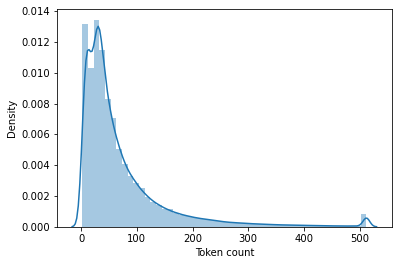

In [27]:
sns.distplot(token_lens)
plt.xlabel('Token count');

# Remove NAs

In [6]:
reviews = pd.read_csv('../data/amazon_outdoors/amazon_reviews_us_Outdoors_v1_00_rebalanced.csv.gz')

In [7]:
reviews.isna().sum()

marketplace           0
customer_id           0
review_id             0
product_id            0
product_parent        0
product_title         0
product_category      0
star_rating           0
helpful_votes         0
total_votes           0
vine                  0
verified_purchase     0
review_headline       1
review_body          49
review_date           0
sentiment             0
dtype: int64

In [16]:
reviews[reviews.review_body.notnull()].to_csv('../data/amazon_outdoors/amazon_reviews_us_Outdoors_v1_00_rebalanced.csv.gz', index=False)